1. Load the swiss data set with pydataset.data
2. Transform the Catholic variable into a categorical variable named is_catholic. The values should be either Catholic or Not Catholic.
3. Drop the Catholic column.
4. Split the data into training and test data sets. We will be trying to predict whether or not a province is catholic.
5. Fit a decision tree classifier using the Education and Fertility features. Measure the model's performance using accuracy, precision, and recall.
6. Fit a logistic regression model using Agriculture and Examination. Measure the model's performance.
7. Fit a K Nearest Neighbors model using two features of your choice. Measure the model's performance.
8. Use the best model from the ones above on your test data set and evaluate the model's predictions.
9. Explain how/why your model is making the predictions that it is.

In [1]:
import env
import pandas as pd
import numpy as np
import pydataset
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#import modules

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pydataset import data
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support as pfs
import sklearn.metrics as skm
import graphviz
from graphviz import Graph
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import math as m
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import io
import env
from prepare import *

In [2]:
df = pydataset.data('swiss')

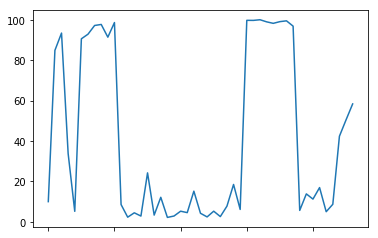

In [3]:
df.Catholic.plot()

In [4]:
def label_Catholic (row):
   if row['Catholic'] > 70 :
      return 'Catholic'
   else:
      return 'Not Catholic'
   return 'Other'

df['is_Catholic'] = df.apply (lambda row: label_Catholic(row), axis=1)

In [5]:
df.sample(2)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_Catholic
Moudon,65.0,55.1,14,3,4.52,22.4,Not Catholic
Aubonne,66.9,67.5,14,7,2.27,19.1,Not Catholic


In [6]:
df.drop(columns='Catholic', inplace=True)
df.head(2)

,Fertility,Agriculture,Examination,Education,Infant.Mortality,is_Catholic
Courtelary,80.2,17.0,15,12,22.2,Not Catholic
Delemont,83.1,45.1,6,9,22.2,Catholic


In [7]:
x_vars = ['Fertility', 'Agriculture', 'Examination', 'Education',
          'Infant.Mortality']

X_train, X_test, y_train, y_test = train_test_split(df[x_vars], df['is_Catholic'], train_size=0.7, random_state=666)

Fit a decision tree classifier using the Education and Fertility features. Measure the model's performance using accuracy, precision, and recall.

In [ ]:
X_train_EF = X_train[['Education', 'Fertility']]
X_test_EF = X_test[['Education', 'Fertility']]
X_train_EF.head(2)

In [ ]:
# for classificaiton you can change the algorithm as gini or entropy 
# (information gain).  Default is gini. Other option is entropy.
# Create the Decision Tree Object

dtm1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)

# Fit the model to the training data
dtm1.fit(X_train_EF, y_train)

# Estimate churn
y_pred = dtm1.predict(X_train_EF)
print('y_pred: ', y_pred)
print('y_pred has ', len(y_pred), ' entries.')

y_pred_proba = dtm1.predict_proba(X_train_EF)
print('y_pred_proba: ')
print(y_pred_proba)
print("y_pred_proba's shape: ", y_pred_proba.shape)

# Compute the Accuracy: 
#   number of correct predictions 
#   over the number of total instances that have been evaluated.
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtm1.score(X_train_EF, y_train)))

# Create the confusion matrix
# Zach gave us this with X_train.prediction, but I'm pretty sure 
# I'm supposed to use y_pred, not X_train.prediction because I did not
# create a prediction column in this model.
confusion_df = pd.DataFrame(confusion_matrix(y_train, y_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

confusion_df

In [ ]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtm1.score(X_test_EF, y_test)))

Fit a logistic regression model using Agriculture and Examination. Measure the model's performance.

In [8]:
X_train_AE = X_train[['Agriculture', 'Examination']]
X_test_AE = X_test[['Agriculture', 'Examination']]
X_train_AE.head(2)

,Agriculture,Examination
Le Locle,16.7,22
Orbe,54.1,20


In [ ]:
logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')

Fit a K Nearest Neighbors model using two features of your choice. Measure the model's performance.

Use the best model from the ones above on your test data set and evaluate the model's predictions.

Explain how/why your model is making the predictions that it is.